# Periodic variables

## Example
- Wind direction. The direction is a periodic radian over $[0,2\pi]$.  
- Calendar time. The time quantities is periodic over 24 hours. 

## Representation
Such quantities can conveniently be represented using an angular (polar) coordinate $0\leq\theta\leq 2\pi$.  
But while summarizing, the results are strongly dependent on the arbitrary of origin. Suppose,
- Origin : $0^{\circ}$
  - $\theta_1=1^{\circ}$
  - $\theta_2=359^{\circ}$
  - Mean : $(\theta_1+\theta_2)/2 = 180^{\circ}$, whereas the radian of the nearest position is $0^{\circ}$.
- Origin : $180^{\circ}$
  - $\theta_1=1^{\circ}$
  - $\theta_2=359^{\circ}$
  - Mean : $[(\theta_1-180^{\circ})+(\theta_2-180^{\circ})]/2 = 0^{\circ}$.
  
A better approach to evaluate the mean of a set of observations is changing these observation from polar cooridinate to Cartisian.
Defining the radius to be $r=1$, then the radian $\theta$ will be transform to 
$$\mathbf{x}=\begin{bmatrix}x_1\\ x_2\end{bmatrix}=\begin{bmatrix}cos\theta\\ sin\theta\end{bmatrix}$$
The mean of observations in Cartisian coordinate is given by
$$\bar{\mathbf{x}}=\frac{1}{N}\sum_{n=1}^N\mathbf{x}_n=\begin{bmatrix}\frac{1}{N}\sum_{n=1}^N cos\theta_n\\ \frac{1}{N}\sum_{n=1}^N sin\theta_n\end{bmatrix}=\begin{bmatrix}\bar{r}cos\bar{\theta}\\ \bar{r}sin\bar{\theta}\end{bmatrix}$$
In General, the mode , say $\bar{r}$, of mean $\bar{\mathbf{x}}$ is mostly less than $r=1$ . In other words, the point $\bar{\mathbf{x}}$ is inside the circle of radius $r=1$.  
The mean of observations in polar coordinate is given by
$$
\bar{\theta}=tan^{-1}\left\{\frac{\bar{r}sin\bar{\theta}}{\bar{r}cos\bar{\theta}}\right\}=tan^{-1}\left\{\frac{\sum_{n=1}^N sin\theta_n}{\sum_{n=1}^N cos\theta_n}\right\}$$


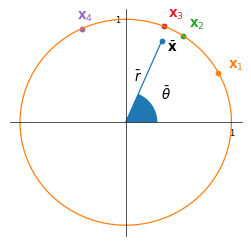

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge

r = 1.0
R = np.linspace(0, 2*np.pi, 100)
D = [.5, 1.0, 1.2, 2.0]

def axesCross(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    
def draw_and_type_data(ax, D):
    i = 0
    sumx = 0
    sumy = 0
    for data in D:
        i = i+1
        xt = (r+.1)*np.cos(data)
        yt = (r+.1)*np.sin(data)
        s = r'$\mathbf{{x}}_{index}$'.format(index=i%8)
        c = 'C{index}'.format(index=i)
        ax.text(xt, yt, s, fontsize=16, color=c)
        x = (r)*np.cos(data)
        y = (r)*np.sin(data)
        ax.scatter(x, y, color=c)
        sumx += x
        sumy += y
    return sumx/i, sumy/i
    
def draw_wedge(ax, R):
    wedge = Wedge((0,0), .3, 0, R * 180/np.pi)
    ax.add_artist(wedge)
    x = .4*np.cos(R/2)
    y = .4*np.sin(R/2)
    ax.text(x, y, r"$\bar{\theta}$", fontsize=16)
    x = .4*np.cos(R+.2)
    y = .4*np.sin(R+.2)
    ax.text(x, y, r"$\bar{r}$", fontsize=16)
    
def draw_circle(ax, r, R):
    x1 = r*np.cos(R)
    x2 = r*np.sin(R)
    ax.plot(x1, x2, color='C1')

def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.xaxis.set_ticks([1])
    ax.yaxis.set_ticks([1])

    axesCross(ax)
    draw_circle(ax, r, R)
    x, y = draw_and_type_data(ax, D)
    
    ax.scatter(x, y)
    ax.plot([0,x],[0,y])
    ax.text(x+.05, y-.1, r"$\bar{\mathbf{x}}$", fontsize=16)

    draw_wedge(ax, np.arctan(y/x))
    
    plt.show()

if __name__=="__main__":
    main()

---------------
--------------
## Probability distribution

By convention, we will consider distribution $p(\theta)$ that have period $2\pi$. So the probability must satisfy
- Probability must bigger than zero. $p(\theta)\geq 1$.
- Integrate to 1. $\displaystyle{\int_{0}^{2\pi}p(\theta)d\theta = 1}$.
- Periodic. $p(\theta+2\pi)=p(\theta)$.

Assume the distribution of the periodic variables is a Gaussian-like distribution.  

For generating this distribution, firstly, consider a 2-D Gaussian over $x_1$ and $x_2$ which is denoted by
$$p(x_1, x_2)=\frac{1}{2\pi\sigma^2}exp\left\{-\frac{(x_1-\mu_1)^2+(x_2-\mu_2)^2}{2\sigma^2}\right\}$$
where the mean is $\mathbf{\mu}=\begin{bmatrix}\mu_1\\ \mu_2\end{bmatrix}$ and the convariance matrix is $\Sigma=\sigma^2\mathbf{I}$, where $\mathbf{I}$ is the $2\times 2$ indentity matrix.  
The countours of constant $p(x_1, x_2)$ are circles.

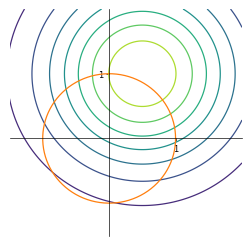

In [36]:
MU=[.5, 1.0]
SIGMA=1.0

gaussian = lambda x,y: 1.0/(2*np.pi*SIGMA)*np.exp(-((x-MU[0])**2+(y-MU[1])**2)/(2*SIGMA))

def draw_gaussian(ax):
    X,Y = np.mgrid[-1.5:2:100j, -1.5:2:100j]
    Z = gaussian(X, Y)
    ax.contour(X, Y, Z)

def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.xaxis.set_ticks([1])
    ax.yaxis.set_ticks([1])

    axesCross(ax)
    draw_circle(ax, r, R)
    draw_gaussian(ax)
    
    plt.show()

if __name__=="__main__":
    main()

This is a 2D-Gaussian, but our periodic variable is only in the circle with $r=1$. The next step is to see what does the distribution interpret on the circle.

Substitute the following transformations into the 2-D Gaussian.
$$\left\{\begin{matrix}x_1=rcos\theta=cos\theta \\ x_2=rsin\theta=sin\theta\end{matrix}\right.
\qquad where\ r=1\qquad
\left\{\begin{matrix}\mu_1=r_0cos\theta_0 \\ \mu_2=r_0sin\theta_0\end{matrix}\right.$$
Then we receive the distribution over the circle with respect to $\theta$
$$\begin{align*}
p(\theta) 
&\propto \frac{1}{2\pi\sigma^2}exp\left\{-\frac{(cos\theta-r_0cos\theta_0)^2+(sin\theta-r_0sin\theta_0)^2}{2\sigma^2}\right\}\\
&=\frac{1}{2\pi\sigma^2}exp\left\{-\frac{cos\theta cos\theta+sin\theta sin\theta+r_0^2(cos\theta_0 cos\theta_0+sin\theta_0 sin\theta_0)-2r_0cos\theta cos\theta_0-2r_0sin\theta sin\theta_0}{2\sigma^2}\right\}\\
&=\frac{1}{2\pi\sigma^2}exp\left\{-\frac{1+r_0^2-2r_0cos(\theta-\theta_0)}{2\sigma^2}\right\}\\
&=\frac{1}{2\pi\sigma^2}exp\left\{\frac{r_0}{\sigma^2}cos(\theta-\theta_0)\right\}\cdot const\\
&=const\cdot exp\left\{\frac{r_0}{\sigma^2}cos(\theta-\theta_0)\right\}\\
&=const\cdot exp\left\{m cos(\theta-\theta_0)\right\}\qquad let\ m=\frac{r_0}{\sigma^2}\\
\end{align*}$$
For normalizing, we should integrate the distribution $p(\theta)$ and evaluate the constant coefficient. 
$$\begin{align*}
1 &= \int_0^{2\pi}p(\theta)d\theta \\
&=const \int_0^{2\pi}exp\left\{m cos(\theta-\theta_0)\right\}d\theta\\
&=const \int_{0+\theta_0}^{2\pi+\theta_0}exp\left\{m cos(\alpha)\right\}d\alpha \qquad let\ \alpha =\theta-\theta_0\\
&=const \int_{0}^{2\pi}exp\left\{m cos(\alpha)\right\}d\alpha\qquad periodic\ distribution\\
&=const \int_{0}^{2\pi}exp\left\{m cos(\theta)\right\}d\theta \\
&=const \cdot 2\pi I_0(m)\qquad I_0(m)=\frac{1}{2\pi}\int_{0}^{2\pi}exp\left\{m cos(\theta)\right\}d\theta \\
&\Rightarrow const=\frac{1}{2\pi I_0(m)}
\end{align*}$$
where 
- $\theta_0$ is the location parameter as it defines where the mode of the distribution is going to be placed.
- $m=\frac{r_0}{\sigma^2}$ is the scale or concentration parameter.
- $I_0(m)$ is the zeroth-order Bessel function of the first kind, and its integral representation happens to have the same form as our expression here. The distribution with respect to $\theta$ therefore takes the form
$$p(\theta|\theta_0, m)=\frac{1}{2\pi I_0(m)}exp\{mcos(\theta-\theta_0)\}$$

This distribution is called **von Mises distribution**.


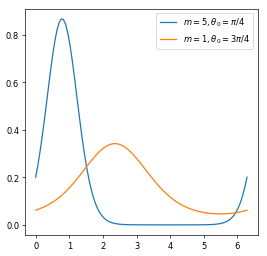

In [41]:
from scipy import special

T1 = np.pi/4
T2 = 3*np.pi/4
M1 = 5
M2 = 1

von_mises = lambda x,t,m: 1.0/(2*np.pi*special.iv(0,m))*np.exp(m*np.cos(x-t))

def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    
    x = np.linspace(0,2*np.pi, 100)
    y = von_mises(x, T1, M1)
    plt1 = ax.plot(x, y, label=r"$m=5,\theta_0=\pi/4$")
    
    y = von_mises(x, T2, M2)
    plt2 = ax.plot(x, y, label=r"$m=1,\theta_0=3\pi/4$")
    ax.legend()
    
    plt.show()

if __name__=="__main__":
    main()

-----------
-----------

# Maximum likelihood
Our duty here is to find the parameter $\theta_0^{ML}$ and $m_{ML}$ that maximize the likelihood function.

Given the observation data $\mathcal{D}$, the log likelihood function is given by
$$\ln p(\mathcal{D}|\theta_0, m)=-N\ln(2\pi)-N\ln I_0(m)+m\sum_{n=1}^N cos(\theta_n-\theta_0)$$
Setting the derivative with respect to $\theta_0$ equal to zero gives
$$\begin{align*}
0&=\sum_{n=1}^N sin(\theta_n-\theta_0)\\
&=\sum_{n=1}^N sin\theta_n cos\theta_0-cos\theta_n sin\theta_0\\
&=cos\theta_0\sum_{n=1}^N sin\theta_n-sin\theta_0\sum_{n=1}^N cos\theta_n\\
&\Rightarrow cos\theta_0\sum_{n=1}^N sin\theta_n=sin\theta_0\sum_{n=1}^N cos\theta_n\\
&\Rightarrow \frac{cos\theta_0}{sin\theta_0}=\frac{\sum_n cos\theta_n}{\sum_n sin\theta_n}\\
&\Rightarrow \theta_0^{ML}=tan^{-1}\left\{\frac{\sum_n sin\theta_n}{\sum_n cos\theta_n}\right\}
\end{align*}$$

Setting the derivative with respect to $\theta_0$ equal to zero gives
$$\begin{align*}
0&=-\frac{d(N\ln I_0(m))}{dm}+\frac{d\left(m\sum_n cos(\theta_n-\theta_0)\right)}{dm}\\
&=-N\frac{d(\ln I_0(m))}{d(I_0(m))}\cdot\frac{d(I_0(m))}{dm}+\sum_{n=1}^N cos(\theta_n-\theta_0^{ML})\\
&=-N\frac{1}{I_0(m)}\cdot I_1(m)+\sum_{n=1}^N cos(\theta_n-\theta_0^{ML})\qquad bessel\ function\ property\ \frac{d(I_0(m))}{dm}=I_1(m)\\
&\Rightarrow \frac{I_1(m)}{I_0(m)}=\frac{1}{N}\sum_{n=1}^Ncos(\theta_n-\theta_0^{ML})\\
&\Rightarrow A(m)=\frac{1}{N}\sum_{n=1}^Ncos(\theta_n-\theta_0^{ML}) \qquad let\ A(m)=\frac{I_1(m)}{I_0(m)}\\
&\Rightarrow A(m)=\frac{1}{N}\sum_{n=1}^Ncos\theta_n cos\theta_0^{ML}-sin\theta_n sin\theta_0^{ML}\\
&\Rightarrow A(m_{ML})=\left(\frac{1}{N}\sum_{n=1}^Ncos\theta_n\right) cos\theta_0^{ML}-\left(\frac{1}{N}\sum_{n=1}^Nsin\theta_n\right) sin\theta_0^{ML}\\
\end{align*}$$
